In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
# Simulate Sensor Data (e.g., Temperature during operation)
np.random.seed(123)
n_points = 500
time = np.arange(n_points)

In [3]:
# Normal operating temperature with some noise
normal_temp = np.random.normal(loc=30, scale=2, size=n_points) + np.sin(time / 50) * 3

# Introduce some anomalies (spikes)
anomalies_idx = np.random.choice(n_points, size=15, replace=False) # 15 anomaly points
anomalies_values_high = np.random.uniform(45, 55, size=10) # High temp anomalies
anomalies_values_low = np.random.uniform(10, 18, size=5) # Low temp anomalies (e.g., sensor fault)

temperature = normal_temp.copy()
temperature[anomalies_idx[:10]] = anomalies_values_high
temperature[anomalies_idx[10:]] = anomalies_values_low

# Create DataFrame (often just a single series for univariate anomaly detection)
temp_series = pd.Series(temperature, name='Temperature_C')
temp_df = pd.DataFrame(temp_series) # IsolationForest expects 2D array


In [4]:
temp_df

,Temperature_C
0,27.828739
1,32.054687
2,30.685925
3,27.167303
4,29.082544
...,...
495,29.763152
496,29.600285
497,28.467971
498,29.093067


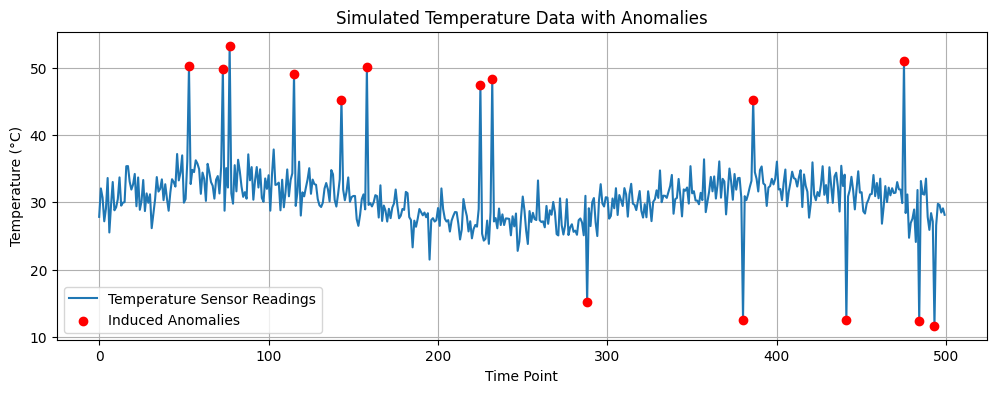

In [5]:
# Visualize the Data
plt.figure(figsize=(12, 4))
plt.plot(temp_series, label='Temperature Sensor Readings')
plt.scatter(anomalies_idx, temperature[anomalies_idx], color='red', label='Induced Anomalies', zorder=5)
plt.title('Simulated Temperature Data with Anomalies')
plt.xlabel('Time Point')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Anomaly Detection using Isolation Forest

model = IsolationForest(n_estimators=100, contamination=0.04, random_state=42) # Or try contamination=0.04 (approx 15/500)

# Fit the model (unsupervised, doesn't need labels)
model.fit(temp_df)

# Predict anomalies: returns 1 for inliers, -1 for outliers
temp_df['Anomaly'] = model.predict(temp_df)
detected_anomalies = temp_df[temp_df['Anomaly'] == -1]

print(f"\n--- Anomaly Detection Results ---")
print(f"Number of points flagged as anomalies: {len(detected_anomalies)}")


--- Anomaly Detection Results ---
Number of points flagged as anomalies: 20


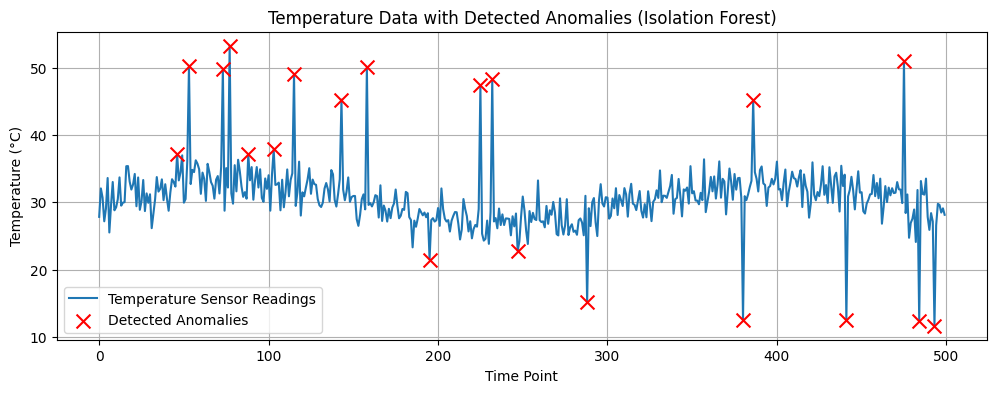

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(temp_df.index, temp_df['Temperature_C'], label='Temperature Sensor Readings')
plt.scatter(detected_anomalies.index, detected_anomalies['Temperature_C'],
            color='red', label='Detected Anomalies', zorder=5, marker='x', s=100)
plt.title('Temperature Data with Detected Anomalies (Isolation Forest)')
plt.xlabel('Time Point')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()